In [7]:
import json
import pandas as pd

# Load your massive JSON file (replace 'file.json' with your filename)
with open('profile.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# If your file contains a list of entries:
records = []
for entry in data:
    records.append({
        'username': entry.get('username'),
        'url': entry.get('url'),
        'fullName': entry.get('fullName'),
        'biography': entry.get('biography'),
        'followersCount': entry.get('followersCount'),
        'followsCount': entry.get('followsCount'),
        'highlightReelCount': entry.get('highlightReelCount'),
        'postsCount': entry.get('postsCount')
    })

# Create DataFrame
df = pd.DataFrame(records)

# Show resulting DataFrame
print(df)


                      username  \
0                         None   
1                         None   
2      mikeypstreetphotography   
3                 callmeshlomi   
4                 styleclicker   
..                         ...   
293            streetphotogldn   
294                 humansofny   
295                       None   
296    david_streetphotography   
297  cameronthomsenphotography   

                                                   url  \
0    https://www.instagram.com/popular/im-a-street-...   
1    https://www.instagram.com/popular/street-photo...   
2    https://www.instagram.com/mikeypstreetphotography   
3               https://www.instagram.com/callmeshlomi   
4               https://www.instagram.com/styleclicker   
..                                                 ...   
293          https://www.instagram.com/streetphotogldn   
294               https://www.instagram.com/humansofny   
295  https://www.instagram.com/popular/street-photo...   
296  https:

C:\Users\huynh\AppData\Local\Temp\ipykernel_23764\2462118029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['followersCount'] = pd.to_numeric(df_clean['followersCount'])
C:\Users\huynh\AppData\Local\Temp\ipykernel_23764\2462118029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['followsCount'] = pd.to_numeric(df_clean['followsCount'])
C:\Users\huynh\AppData\Local\Temp\ipykernel_23764\2462118029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

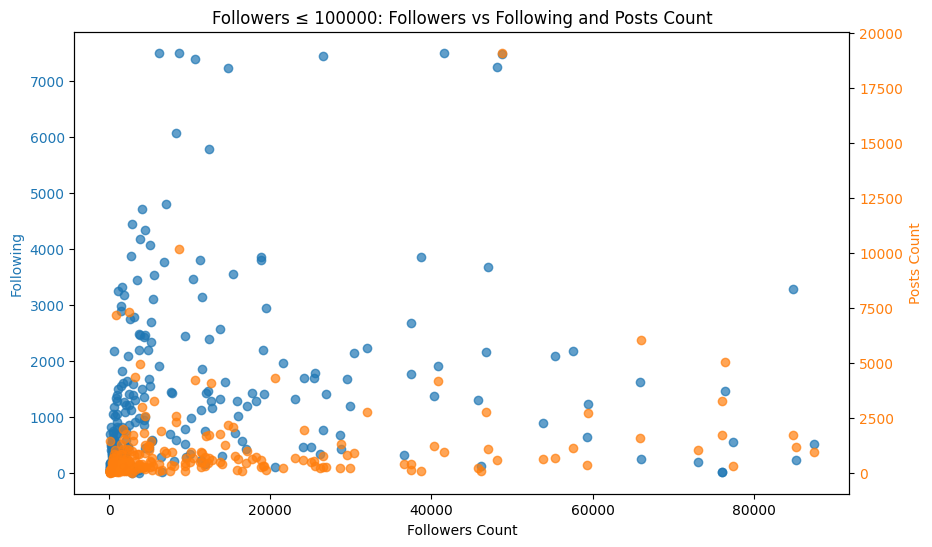

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Set max followers count filter
max_followers = 100000

# Clean the DataFrame and filter by max followers
df_clean = df.dropna(subset=['followersCount', 'followsCount', 'postsCount'])
df_clean['followersCount'] = pd.to_numeric(df_clean['followersCount'])
df_clean['followsCount'] = pd.to_numeric(df_clean['followsCount'])
df_clean['postsCount'] = pd.to_numeric(df_clean['postsCount'])

df_filtered = df_clean[df_clean['followersCount'] <= max_followers]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter for Following (left y-axis)
color = 'tab:blue'
ax1.set_xlabel('Followers Count')
ax1.set_ylabel('Following', color=color)
ax1.scatter(df_filtered['followersCount'], df_filtered['followsCount'], color=color, label='Following', alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Scatter for Posts Count (right y-axis)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Posts Count', color=color)
ax2.scatter(df_filtered['followersCount'], df_filtered['postsCount'], color=color, label='Posts Count', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Followers ≤ {max_followers}: Followers vs Following and Posts Count')
plt.show()




In [2]:
import json
import pandas as pd

def extract_instagram_post_info(post_json):
    return {
        # "inputUrl": post_json.get("inputUrl"),
        "id": post_json.get("id"),
        # "type": post_json.get("type"),
        # "shortCode": post_json.get("shortCode"),
        "caption": post_json.get("caption"),
        "hashtags": post_json.get("hashtags"),
        "commentsCount": post_json.get("commentsCount"),
        # "firstComment": post_json.get("firstComment"),
        # "latestComments": post_json.get("latestComments"),
        # "url": post_json.get("url"),
        "likesCount": post_json.get("likesCount"),
        "timestamp": post_json.get("timestamp"),
        "displayUrl": post_json.get("displayUrl"),
        "images": post_json.get("images"),
        # "locationName": post_json.get("locationName"),
        # "ownerFullName": post_json.get("ownerFullName"),
        "ownerUsername": post_json.get("ownerUsername")
    }

# Example to load JSON file and convert to DataFrame

with open('posts_partial.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Assuming data is a list of post dictionaries
post_records = [extract_instagram_post_info(post) for post in data]

df = pd.DataFrame(post_records)

print(df)
df.to_csv('df_clean_exported.csv', index=False)


                       id                                            caption  \
0                    None                                               None   
1     3694886276623846287  Nothing else matters \n.\n.\n.\n.\n.\n.\n#stre...   
2     2764931238844960524  Something a bit different today. I’ve been aft...   
3     3589412920763320834  When curiosity gets the better of you\n\n#auss...   
4     3110616290589658233  By @alfredooliva 👏🏻📸 \n\n#thespc\n.\n.\n.\n.\n...   
...                   ...                                                ...   
1549  3577592795265467331  Portraits of Velora\n———————————————\nFrom my ...   
1550  3357006965122618286  Photo by @groundedstreet taken on the Cadiz + ...   
1551  3544178680174031413               Beautiful mother daughter moment! 🖤🍂   
1552  3333118864139394506  INSPIRATION: SAUL LEITER\n\nSaul Leiter was Bo...   
1553  3548394823092040245                       Ren faire street portraits 💚   

                                       

In [3]:
import matplotlib.pyplot as plt
# Print statistics for a numeric series with given "special" missing or sentinel values
def print_stats(series, na_val=None, special_vals=None, upper_bound=None, name=""):
    special_vals = special_vals or []
    na_count = series.isna().sum()
    print(f"{name} - NaN count: {na_count}")
    for val in special_vals:
        count = (series == val).sum()
        print(f"{name} - {val} count: {count}")
    print(f"{name} - Total count: {series.size}")
# Prepare likes or comments data, filling NAs and replacing special sentinel values for filtering
def prepare_counts(series, na_fill, replace_map, max_val=None):
    prepared = series.fillna(na_fill)
    for old_val, new_val in replace_map.items():
        prepared = prepared.replace(old_val, new_val)
    if max_val is not None:
        filtered = prepared[(prepared <= max_val)]
    else:
        filtered = prepared
    return prepared, filtered
# Number of unique usernames
unique_usernames = df['ownerUsername'].nunique()
print(f"Unique usernames: {unique_usernames}")

# Number of posts per username
posts_per_username = df['ownerUsername'].value_counts()

# Median and mean posts per username
median_posts = posts_per_username.median()
mean_posts = posts_per_username.mean()
print(f"Median posts per username: {median_posts}")
print(f"Mean posts per username: {mean_posts:.2f}")

# Likes processing & plot
likes_original = df['likesCount']
print_stats(likes_original, special_vals=[-1], upper_bound=10000, name="Likes Count")
likes, likes_filtered = prepare_counts(likes_original, na_fill=-5, replace_map={-1: -10}, max_val=10000)
# Comments processing & plot
comments_original = df['commentsCount']
print_stats(comments_original, special_vals=[-10], upper_bound=1000, name="Comments Count")
comments, comments_filtered = prepare_counts(comments_original, na_fill=-5, replace_map={-10: 0})
comments_filtered = comments[(comments > 0) & (comments <= 1000)]

Unique usernames: 68
Median posts per username: 1.0
Mean posts per username: 22.84
Likes Count - NaN count: 1
Likes Count - -1 count: 156
Likes Count - Total count: 1554
Comments Count - NaN count: 1
Comments Count - -10 count: 0
Comments Count - Total count: 1554


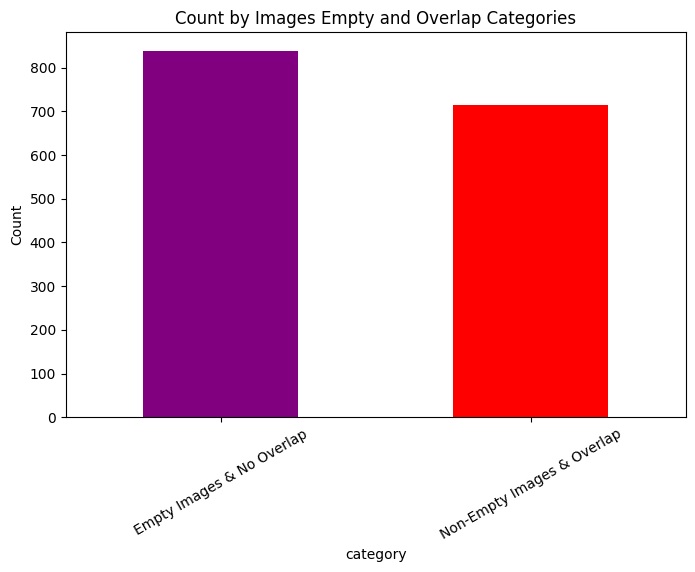

                                             displayUrl  \
0                                                  None   
1     https://scontent-lga3-3.cdninstagram.com/v/t51...   
2     https://scontent-atl3-3.cdninstagram.com/v/t51...   
3     https://scontent-lga3-3.cdninstagram.com/v/t51...   
4     https://scontent-lax3-1.cdninstagram.com/v/t51...   
...                                                 ...   
1549  https://scontent-hou1-1.cdninstagram.com/v/t51...   
1550  https://instagram.ftol1-1.fna.fbcdn.net/v/t39....   
1551  https://scontent-hou1-1.cdninstagram.com/v/t51...   
1552  https://scontent-hou1-1.cdninstagram.com/v/t39...   
1553  https://scontent-det1-1.cdninstagram.com/v/t51...   

                                                 images  overlap  \
0                                                  None    False   
1     [https://scontent-lga3-3.cdninstagram.com/v/t5...     True   
2                                                    []    False   
3                  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to check overlap
def check_overlap(row):
    display_url = row['displayUrl']
    images = row['images']
    if pd.isna(display_url) or display_url is None:
        return False
    if images is None or not isinstance(images, list):
        return False
    return display_url in images

# Apply overlap check
df['overlap'] = df.apply(check_overlap, axis=1)

# Define if images list is empty or not
df['images_empty'] = df['images'].apply(lambda x: True if x == [] or x is None else False)

# Define combined category column
def category(row):
    if row['images_empty'] and row['overlap']:
        return 'Empty Images & Overlap'
    elif row['images_empty'] and not row['overlap']:
        return 'Empty Images & No Overlap'
    elif not row['images_empty'] and row['overlap']:
        return 'Non-Empty Images & Overlap'
    else:
        return 'Non-Empty Images & No Overlap'

df['category'] = df.apply(category, axis=1)

# Count by category
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['purple', 'red', 'green', 'blue'])
plt.ylabel('Count')
plt.title('Count by Images Empty and Overlap Categories')
plt.xticks(rotation=30)
plt.show()

# Print resulting DataFrame for reference
print(df[['displayUrl', 'images', 'overlap', 'images_empty', 'category']])


In [4]:
import pandas as pd

def clean_instagram_data(df: pd.DataFrame) -> pd.DataFrame:
    # 1. Remove rows with any NaN or None values
    df_clean = df.dropna(how='any')

    # 2. Remove rows where likesCount or commentsCount are negative
    df_clean = df_clean[(df_clean['likesCount'] >= 0) & (df_clean['commentsCount'] >= 0)]

    # 3. Clean captions: remove \n and \\n, tokenize, and remove hashtags present in the hashtags list
    def clean_caption(caption, hashtags):
        if not caption:
            return ''
        # Remove newline characters
        caption_no_n = caption.replace('\\n', ' ').replace('\n', ' ')
        # Split caption into tokens
        tokens = caption_no_n.split()
        # Prepare set of hashtags in lowercase without #
        hashtags_set = set(h.lower().lstrip('#') for h in hashtags) if isinstance(hashtags, list) else set()
        # Remove tokens that are hashtags (starting with #) or that match any hashtag
        tokens_cleaned = [t for t in tokens if not t.startswith('#') and t.lower() not in hashtags_set]
        return ' '.join(tokens_cleaned)

    df_clean['caption_cleaned'] = df_clean.apply(
        lambda row: clean_caption(row['caption'], row['hashtags']),
        axis=1
    )

    # 4. For rows where images column is empty list, replace with list containing displayUrl
    def fix_images(images, displayUrl):
        if isinstance(images, list) and len(images) == 0:
            if isinstance(displayUrl, str) and displayUrl.strip():
                return [displayUrl]
        return images

    df_clean['images'] = df_clean.apply(
        lambda row: fix_images(row['images'], row['displayUrl']),
        axis=1
    )

    return df_clean

# Example usage:
df_cleaned = clean_instagram_data(df)
df_cleaned.to_csv('cleaned_data.csv', index=False) 
print(df_cleaned)


                       id                                            caption  \
1     3694886276623846287  Nothing else matters \n.\n.\n.\n.\n.\n.\n#stre...   
2     2764931238844960524  Something a bit different today. I’ve been aft...   
3     3589412920763320834  When curiosity gets the better of you\n\n#auss...   
4     3110616290589658233  By @alfredooliva 👏🏻📸 \n\n#thespc\n.\n.\n.\n.\n...   
5     2768472696096030915  An exercise in framing. I’ve been working my w...   
...                   ...                                                ...   
1548  3576912524882152840  Still can’t believe this happened! I got recog...   
1550  3357006965122618286  Photo by @groundedstreet taken on the Cadiz + ...   
1551  3544178680174031413               Beautiful mother daughter moment! 🖤🍂   
1552  3333118864139394506  INSPIRATION: SAUL LEITER\n\nSaul Leiter was Bo...   
1553  3548394823092040245                       Ren faire street portraits 💚   

                                       

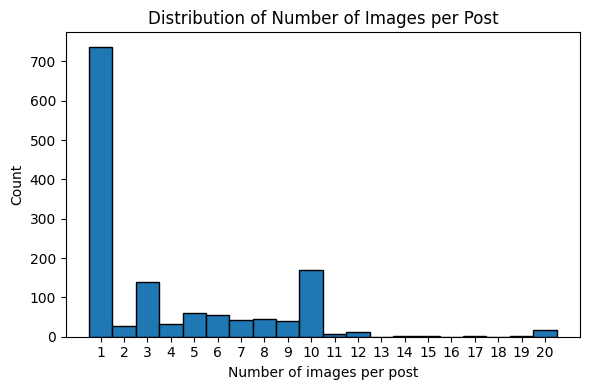

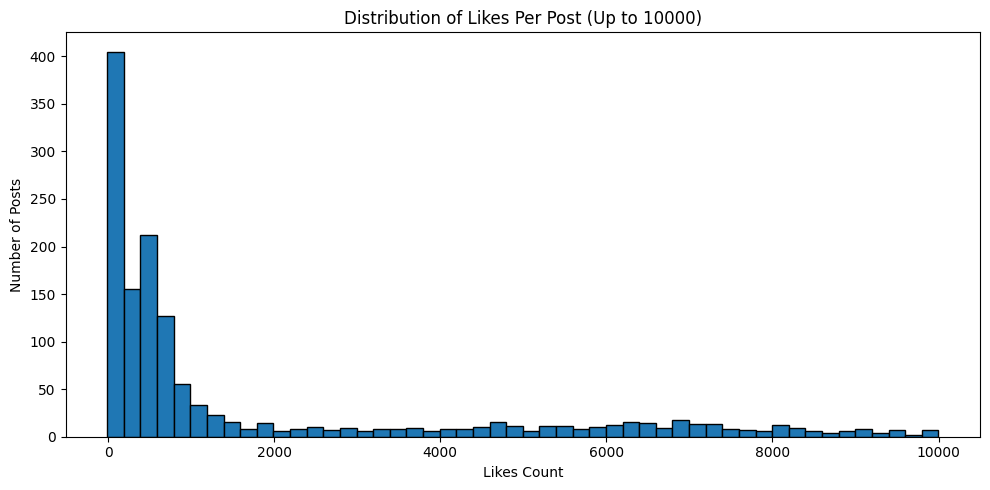

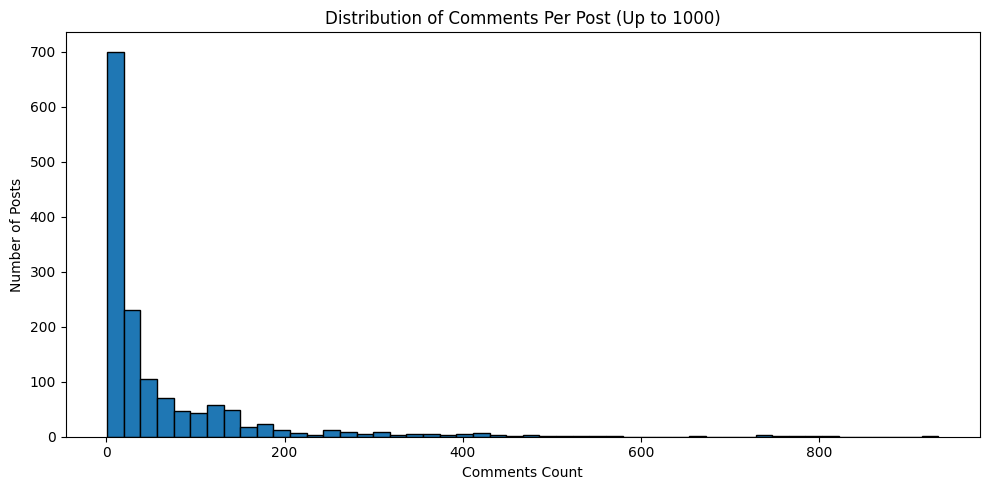

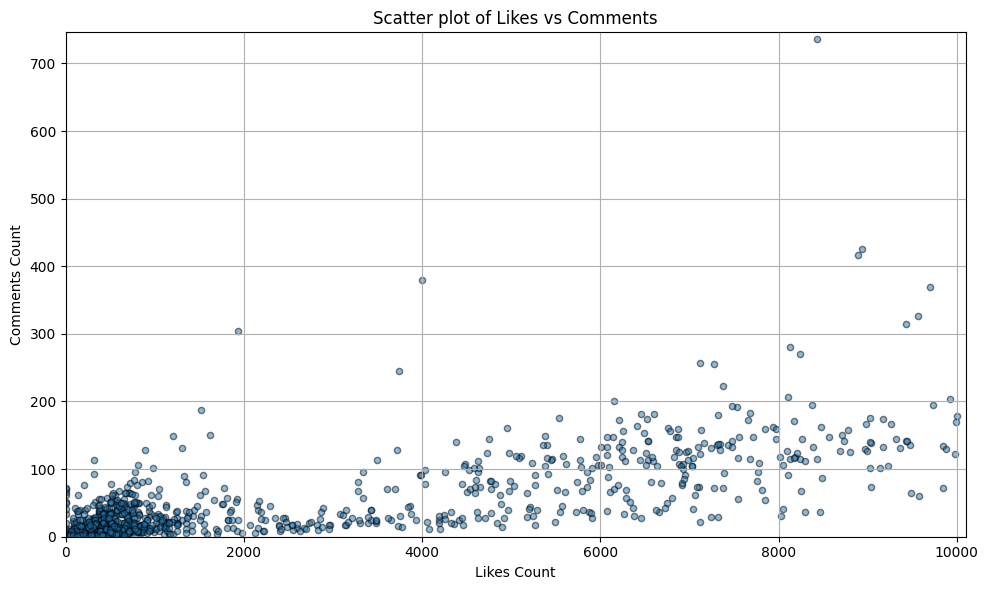

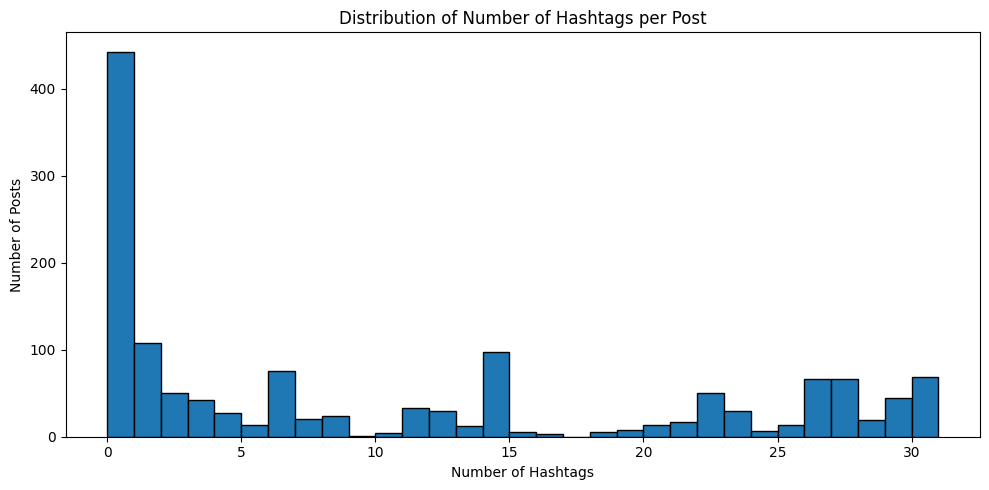

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Helper function to safely count elements in a column of lists, treating None as empty list
def safe_count_series(series):
    return series.apply(lambda x: len(x) if isinstance(x, list) else 0)


# Plot histogram with clearly defined bins and labels
def plot_histogram(data, bins, xlabel, ylabel, title, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.hist(data, bins=bins, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()


# Initial data processing for images count histogram
img_counts = safe_count_series(df_cleaned['images'])
plt.figure(figsize=(6, 4))
bins = np.arange(img_counts.min(), img_counts.max() + 2) - 0.5
plt.hist(img_counts, bins=bins, edgecolor='black')
plt.xlabel('Number of images per post')
plt.ylabel('Count')
plt.title('Distribution of Number of Images per Post')
plt.xticks(np.arange(img_counts.min(), img_counts.max() + 1, 1))
plt.tight_layout()
plt.show()


plot_histogram(likes_filtered, bins=50, xlabel='Likes Count', ylabel='Number of Posts',
               title='Distribution of Likes Per Post (Up to 10000)', figsize=(10, 5))


plot_histogram(comments_filtered, bins=50, xlabel='Comments Count', ylabel='Number of Posts',
               title='Distribution of Comments Per Post (Up to 1000)', figsize=(10, 5))


# Scatter plot Likes vs Comments for valid data points
valid_mask = (likes >= 0) & (comments > 0) & (likes < 10000)
likes_valid = likes[valid_mask]
comments_valid = comments[valid_mask]


plt.figure(figsize=(10, 6))
plt.scatter(likes_valid, comments_valid, alpha=0.5, edgecolor='k', s=20)
plt.xlabel('Likes Count')
plt.ylabel('Comments Count')
plt.title('Scatter plot of Likes vs Comments')
plt.xlim(0, likes_valid.max() + 100)
plt.ylim(0, comments_valid.max() + 10)
plt.grid(True)
plt.tight_layout()
plt.show()

hashtags_counts = safe_count_series(df_cleaned['hashtags'])
plot_histogram(hashtags_counts, bins=range(0, hashtags_counts.max() + 2),
               xlabel='Number of Hashtags', ylabel='Number of Posts',
               title='Distribution of Number of Hashtags per Post')